In [216]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
%matplotlib inline


In [217]:
master=pd.read_csv("lahman-csv_2015-01-24/MASTER.csv")
batting=pd.read_csv("lahman-csv_2015-01-24/Batting.csv")
pitching=pd.read_csv("lahman-csv_2015-01-24/Pitching.csv")
fielding=pd.read_csv("lahman-csv_2015-01-24/Fielding.csv")
salary=pd.read_csv("lahman-csv_2015-01-24/Salaries.csv")
team=pd.read_csv("lahman-csv_2015-01-24/Teams.csv")
awards_players=pd.read_csv("lahman-csv_2015-01-24/AwardsPlayers.csv")
awards_share_player=pd.read_csv("lahman-csv_2015-01-24/AwardsSharePlayers.csv")


In [218]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18589 entries, 0 to 18588
Data columns (total 24 columns):
playerID        18589 non-null object
birthYear       18444 non-null float64
birthMonth      18274 non-null float64
birthDay        18117 non-null float64
birthCountry    18516 non-null object
birthState      17975 non-null object
birthCity       18389 non-null object
deathYear       9225 non-null float64
deathMonth      9224 non-null float64
deathDay        9223 non-null float64
deathCountry    9223 non-null object
deathState      9169 non-null object
deathCity       9219 non-null object
nameFirst       18549 non-null object
nameLast        18589 non-null object
nameGiven       18549 non-null object
weight          17717 non-null float64
height          17780 non-null float64
bats            17399 non-null object
throws          17610 non-null object
debut           18399 non-null object
finalGame       18399 non-null object
retroID         18535 non-null object
bbrefID        

At first, I will not utilize the  "birth" and "death" information. Therefore I'll delete from this data set.

In [219]:
master.drop(["birthYear","birthMonth","birthDay","birthCountry","birthCity","birthState","deathYear","deathMonth","deathDay","deathCountry","deathState","deathCity"],axis=1,inplace=True)
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18589 entries, 0 to 18588
Data columns (total 12 columns):
playerID     18589 non-null object
nameFirst    18549 non-null object
nameLast     18589 non-null object
nameGiven    18549 non-null object
weight       17717 non-null float64
height       17780 non-null float64
bats         17399 non-null object
throws       17610 non-null object
debut        18399 non-null object
finalGame    18399 non-null object
retroID      18535 non-null object
bbrefID      18588 non-null object
dtypes: float64(2), object(10)
memory usage: 1.8+ MB


In [220]:
player=master.merge(batting,on="playerID")
batting=player.merge(salary,on=["playerID","yearID","teamID","lgID"])

batting.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23765 entries, 0 to 23764
Data columns (total 34 columns):
playerID     23765 non-null object
nameFirst    23765 non-null object
nameLast     23765 non-null object
nameGiven    23765 non-null object
weight       23765 non-null float64
height       23765 non-null float64
bats         23765 non-null object
throws       23765 non-null object
debut        23765 non-null object
finalGame    23765 non-null object
retroID      23765 non-null object
bbrefID      23765 non-null object
yearID       23765 non-null int64
stint        23765 non-null int64
teamID       23765 non-null object
lgID         23765 non-null object
G            23765 non-null int64
AB           21888 non-null float64
R            21888 non-null float64
H            21888 non-null float64
2B           21888 non-null float64
3B           21888 non-null float64
HR           21888 non-null float64
RBI          21888 non-null float64
SB           21888 non-null float64
CS       

In [221]:
batting[["playerID","nameGiven","yearID","AB","lgID"]].head(30)

,playerID,nameGiven,yearID,AB,lgID
0,aardsda01,David Allan,2004,0,NL
1,aardsda01,David Allan,2007,0,AL
2,aardsda01,David Allan,2008,1,AL
3,aardsda01,David Allan,2009,0,AL
4,aardsda01,David Allan,2010,0,AL
5,aardsda01,David Allan,2012,0,AL
6,aasedo01,Donald William,1986,NaN,AL
7,aasedo01,Donald William,1987,NaN,AL
8,aasedo01,Donald William,1988,NaN,AL
9,aasedo01,Donald William,1989,5,NL


There are people who have no "AB" in this dataset.
They are pitcher in AL so they basically have no chance to be batters.So I don't count them as batters.


In [222]:
batting.dropna(inplace=True)

In [223]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21888 entries, 0 to 23764
Data columns (total 34 columns):
playerID     21888 non-null object
nameFirst    21888 non-null object
nameLast     21888 non-null object
nameGiven    21888 non-null object
weight       21888 non-null float64
height       21888 non-null float64
bats         21888 non-null object
throws       21888 non-null object
debut        21888 non-null object
finalGame    21888 non-null object
retroID      21888 non-null object
bbrefID      21888 non-null object
yearID       21888 non-null int64
stint        21888 non-null int64
teamID       21888 non-null object
lgID         21888 non-null object
G            21888 non-null int64
AB           21888 non-null float64
R            21888 non-null float64
H            21888 non-null float64
2B           21888 non-null float64
3B           21888 non-null float64
HR           21888 non-null float64
RBI          21888 non-null float64
SB           21888 non-null float64
CS       

There is no batter who has "NaN" on "AB" anymore in this dataset.

In [224]:
player2=master.merge(pitching,on="playerID")
pitching=player2.merge(salary,on=["playerID","yearID","teamID","lgID"])
pitching.head()

,playerID,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary
0,aardsda01,David,Aardsma,David Allan,205,75,R,R,4/6/2004,9/28/2013,...,0,2,0,61,5,8,0,1,NaN,300000
1,aardsda01,David,Aardsma,David Allan,205,75,R,R,4/6/2004,9/28/2013,...,2,1,0,151,7,24,2,1,NaN,387500
2,aardsda01,David,Aardsma,David Allan,205,75,R,R,4/6/2004,9/28/2013,...,3,5,0,228,7,32,3,2,NaN,403250
3,aardsda01,David,Aardsma,David Allan,205,75,R,R,4/6/2004,9/28/2013,...,2,0,0,296,53,23,2,1,NaN,419000
4,aardsda01,David,Aardsma,David Allan,205,75,R,R,4/6/2004,9/28/2013,...,2,2,0,202,43,19,7,1,NaN,2750000


# Overview of MLB data

At first,I'll look into the overview of MLB.
What's the average salary of Batters and Pitchers by year?

In [225]:
batter_ave=batting.groupby("yearID",as_index=False).mean()
pitcher_ave=pitching.groupby("yearID",as_index=False).mean()

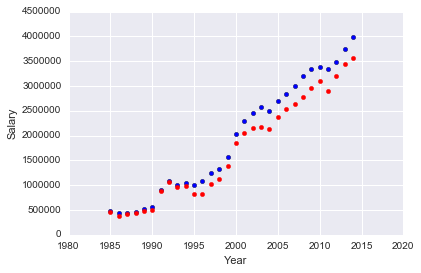

In [226]:
plt.scatter(batter_ave["yearID"],batter_ave["salary"])
plt.scatter(pitcher_ave["yearID"],pitcher_ave["salary"],color="r")
plt.xlabel("Year")
plt.ylabel("Salary")

The graph above clearly shows that the average salary is on the rise year by year.
The salary in 2015 is around 8 times higher than that in 1985.
And the batter's salary is slightly higher than that of pitcher's.

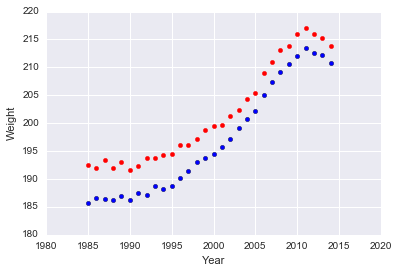

In [227]:
plt.scatter(batter_ave["yearID"],batter_ave["weight"])
plt.scatter(pitcher_ave["yearID"],pitcher_ave["weight"],color="r")
plt.xlabel("Year")
plt.ylabel("Weight")

Interestingly,the weight is also increasing. Picher is  a bit heavier than batter on average.

The correlation of Year and HR is -0.356219834886


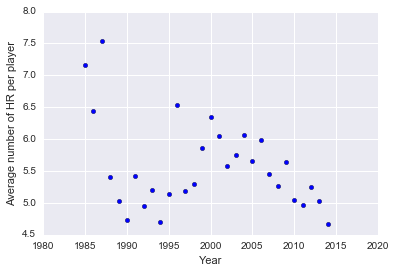

In [228]:
plt.scatter(batter_ave["yearID"],batter_ave["HR"])
plt.xlabel("Year")
plt.ylabel("Average number of HR per player")
corr=np.corrcoef(batter_ave["yearID"],batter_ave["HR"])
print "The correlation of Year and HR is %s" %(corr[0,1])

The average number of Homeruns are decreasing regardress of the increase in weight.(The correlation is -0.36)
This may conclude that heavier weight on average has nothing to do with the number of homeruns.


The correlation of Year and CG is -0.84597486346


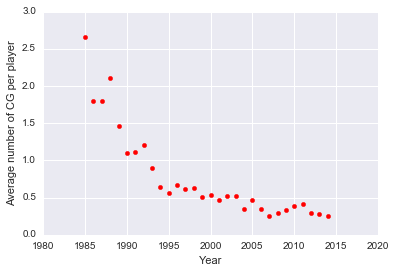

In [229]:
plt.scatter(pitcher_ave["yearID"],pitcher_ave["CG"],color="r")
plt.xlabel("Year")
plt.ylabel("Average number of CG per player")
corr=np.corrcoef(pitcher_ave["yearID"],pitcher_ave["CG"])
print "The correlation of Year and CG is %s" %(corr[0,1])

The average number of Complete Games are decreasing year by year(The correlation is -0.85). This means that one pitcher(Starter) doesn't tend to complete games by himself. Setup pitcher, middle relief pitcher and closer became more important than before.

## Conclusion
The average saslary is dramatically incerasing year by year.
The average weight is also on the rise,however the average number of homeruns are decreasing.The cause of this may be that more pitchers pitch in a game.Therefore, pitchers will be changed before using up their stamina .

# What team is the most efficient?

I showed that the average salary is increasing. So I'll investigate what team is the most efficient. Since the data is so huge that I confine the data within these 14 years (from 2000 to 2014) 

In [230]:
salary_team=salary.merge(team,on=["yearID","teamID","lgID"])

In [231]:
team_above_2000=salary_team[salary_team["yearID"]>=2000].groupby("teamID",as_index=False).mean().sort("Rank",ascending=True)
team_above_2000.head()

/Users/Ryosuke/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,teamID,yearID,salary,Rank,G,Ghome,W,L,R,AB,...,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF
20,NYA,2006.919240,6422152.418052,1.546318,161.857482,80.857482,94.738717,66.978622,842.779097,5575.285036,...,1448.624703,164.413302,477.833729,1155.087886,94.902613,138.719715,0.983983,3682869.657957,101.543943,100.327791
28,SLN,2006.985612,3269386.690647,1.784173,161.935252,81.007194,90.748201,71.187050,780.817746,5537.383693,...,1426.515588,157.467626,488.573141,1064.285372,98.517986,160.685851,0.983978,3283160.527578,98.865707,98.069544
14,LAA,2009.484099,4186119.031802,1.791519,162.000000,81.000000,90.660777,71.339223,761.081272,5570.699647,...,1420.833922,157.505300,492.731449,1147.699647,98.328622,145.734982,0.983675,3235651.572438,97.385159,96.879859
2,ATL,2006.858852,3273933.543062,1.880383,161.933014,81.000000,89.361244,72.504785,749.633971,5530.648325,...,1397.222488,144.705742,516.057416,1133.966507,103.277512,151.186603,0.983400,2562463.973684,100.358852,99.545455
22,OAK,2007.137019,2000217.447115,1.932692,161.867788,81.000000,88.100962,73.766827,757.889423,5541.923077,...,1394.014423,149.454327,503.622596,1084.262019,104.391827,151.459135,0.982990,1843218.225962,97.639423,96.980769


Apparently,NYA has been the best Rank,but the average salary  is quite high.
To see how good the NYA's results, I plot the graph below.

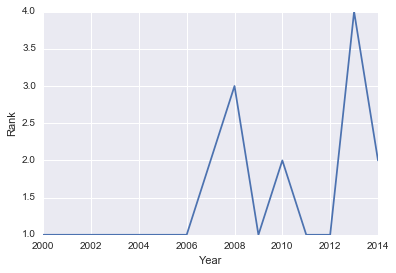

In [232]:
nya_rank=team[(team["teamID"]=="NYA") & (team["yearID"]>=2000)]
x=nya_rank["yearID"]
y=nya_rank["Rank"]
plt.plot(x,y)
plt.xlabel("Year")
plt.ylabel("Rank")

In [233]:
team[(team["teamID"]=="NYA") &(team["WSWin"]=="Y") & (team["yearID"]>=2000)]

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2343,2000,AL,NYA,NYY,E,1,161,80,87,74,...,132,0.981,New York Yankees,Yankee Stadium II,3055435,99,98,NYY,NYA,NYA
2612,2009,AL,NYA,NYY,E,1,162,81,103,59,...,131,0.985,New York Yankees,Yankee Stadium III,3719358,105,103,NYY,NYA,NYA


The graph and table explain that NYA was 1st rank for 10 times within 14 years, and in 2000 and 2009, NYA was World Series Winner.

I'll introduce "average salary divided by number of Wins" to see how much salary the team pays for a win.
This will show us the most efficient team per win.

In [234]:
team_above_2000["salary_per_win"]=team_above_2000["salary"]/team_above_2000["W"]
team_above_2000.sort("salary_per_win").head()

/Users/Ryosuke/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,teamID,yearID,salary,Rank,G,Ghome,W,L,R,AB,...,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF,salary_per_win
11,FLO,2005.451613,1370715.577713,3.410557,161.821114,80.601173,80.302053,81.519062,734.445748,5522.970674,...,152.451613,586.442815,1136.178886,108.706745,150.331378,0.981968,1372803.530792,97.882698,98.208211,17069.496111
19,MON,2001.965035,1396296.034965,4.027972,162.000000,80.797203,73.258741,88.741259,696.874126,5460.027972,...,181.846154,532.909091,1053.370629,116.020979,154.601399,0.980993,824669.979021,103.335664,103.755245,19059.787419
29,TBA,2006.855746,1716285.757946,3.677262,161.845966,80.858191,75.929095,85.916870,723.202934,5513.833741,...,180.743276,546.227384,1099.921760,105.374083,146.195599,0.982408,1445224.320293,97.088020,97.760391,22603.795685
22,OAK,2007.137019,2000217.447115,1.932692,161.867788,81.000000,88.100962,73.766827,757.889423,5541.923077,...,149.454327,503.622596,1084.262019,104.391827,151.459135,0.982990,1843218.225962,97.639423,96.980769,22703.695989
24,PIT,2006.973558,1764438.675481,4.718750,161.802885,80.795673,71.454327,90.348558,675.997596,5492.593750,...,155.990385,562.634615,1035.415865,110.713942,164.225962,0.982149,1887553.271635,98.245192,99.177885,24693.237645


The more the team pay, the higher rank they can get seem to be fact and vice versa.
However, OAK deserves to watch much deeper since the average salary is 4th smallest but the average rank is 1.93(5th highest).

In [235]:
oak_rank=team[(team["teamID"]=="OAK") &(team["yearID"]>=2000)]
oak_rank.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2345,2000,AL,OAK,OAK,W,1,161,81,91,70,...,164,0.978,Oakland Athletics,Oakland Coliseum,1603744,96,95,OAK,OAK,OAK
2375,2001,AL,OAK,OAK,W,2,162,81,102,60,...,151,0.980,Oakland Athletics,Oakland Coliseum,2133277,99,97,OAK,OAK,OAK
2405,2002,AL,OAK,OAK,W,1,162,81,103,59,...,144,0.984,Oakland Athletics,Oakland Coliseum,2169811,98,97,OAK,OAK,OAK
2435,2003,AL,OAK,OAK,W,1,162,81,96,66,...,145,0.983,Oakland Athletics,Oakland Coliseum,2216596,99,98,OAK,OAK,OAK
2465,2004,AL,OAK,OAK,W,2,162,81,91,71,...,172,0.986,Oakland Athletics,Network Associates Coliseum,2201516,99,98,OAK,OAK,OAK


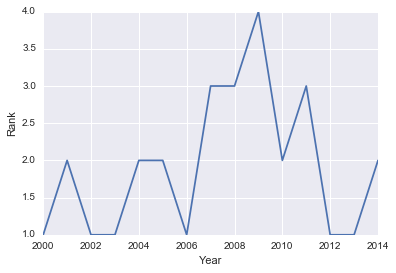

In [236]:
plt.plot(oak_rank["yearID"],oak_rank["Rank"])
plt.xlabel("Year")
plt.ylabel("Rank")

In [237]:
len(oak_rank[oak_rank["WSWin"]=="Y"])

0

OAK became 1st rank for 6 times from 2000 to 2014,however has never become World champion.

What is the difference among NYA and OAK and average of all the teams?
Before diving into that, I'd like to check the salary in NYA and OAK since the outliers may effect the average salary significantly.


In [238]:
salary_NYA=salary[(salary["teamID"]=="NYA") & (salary["yearID"]>=2000)]
salary_OAK=salary[(salary["teamID"]=="OAK") & (salary["yearID"]>=2000)]

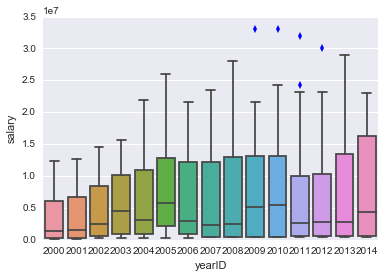

In [239]:
sns.boxplot(x="yearID",y="salary",data=salary_NYA)

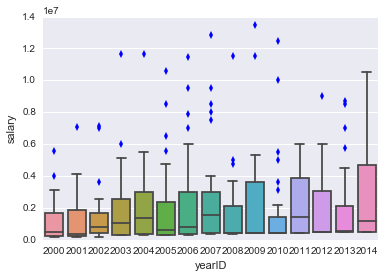

In [240]:
sns.boxplot(x="yearID",y="salary",data=salary_OAK)

NYA has small number of outliers(much higher salary than OAK though) and OAK has several outliers.
and the median in NYA is much higher than OAK.This means that the average salary of OAK is largely affected by outliers(still cheaper than NYA).

<br>I'll investigate the 2014's salary of both teams below.

In [241]:
salary_OAK_2014=salary_OAK[(salary_OAK["yearID"]==2014)]
salary_NYA_2014=salary_NYA[(salary_NYA["yearID"]==2014)]

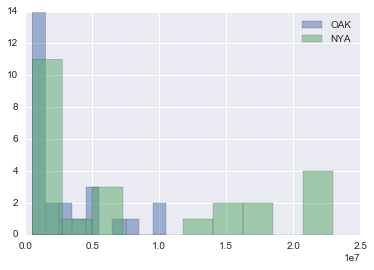

In [242]:
plt.hist(salary_OAK_2014["salary"],alpha=0.5,label="OAK")
plt.hist(salary_NYA_2014["salary"],alpha=0.5,label="NYA")
plt.legend()

There are 9 players in NYA who surpass 10 million dollars,however there are 2 players in OAK who are around 10 millon dollars.

#  What is the difference among NYA and OAK and average of all the teams?

In [243]:
batter=batting[batting["yearID"]>=2000].groupby(["yearID","teamID"],as_index=False).sum()
batter["AVE"]=batter["H"]/batter["AB"]
batter["OBP"]=(batter["H"]+batter["BB"]+batter["HBP"])/(batter["AB"]+batter["BB"]+batter["HBP"]+batter["SF"])
batter["SLG"]=((batter["H"]-batter["2B"]-batter["3B"]-batter["HR"])*1.0+batter["2B"]*2+batter["3B"]*3+batter["HR"]*4)/batter["AB"]
batter["OPS"]=batter["OBP"]+batter["SLG"]
batter.head()

,yearID,teamID,weight,height,stint,G,AB,R,H,2B,...,IBB,HBP,SH,SF,GIDP,salary,AVE,OBP,SLG,OPS
0,2000,ANA,5389,2055,28,1981,5255,816,1492,290,...,43,45,38,41,117,51064167,0.283920,0.354379,0.481827,0.836206
1,2000,ARI,5353,2056,31,1814,4772,687,1254,245,...,31,51,43,48,92,82729500,0.262783,0.332834,0.428961,0.761795
2,2000,ATL,5234,1975,27,1994,5118,760,1413,259,...,34,54,81,44,114,75617836,0.276084,0.351833,0.438062,0.789894
3,2000,BAL,5397,2057,28,1652,4407,655,1218,246,...,31,31,20,43,121,81247435,0.276378,0.348912,0.444520,0.793432
4,2000,BOS,4924,1894,26,1840,4539,663,1236,267,...,37,31,27,38,83,69277833,0.272307,0.349494,0.440626,0.790119


I introduced some of common indicators.
<br>AVE:Average
<br>OBP:On Base Percentage
<br>SLG:Slugging Percentage
<br>OPS:On-ase Plus Slugging

In [244]:
Oakland=batter[batter["teamID"]=="OAK"]
Oakland.head()

,yearID,teamID,weight,height,stint,G,AB,R,H,2B,...,IBB,HBP,SH,SF,GIDP,salary,AVE,OBP,SLG,OPS
20,2000,OAK,5297,1966,27,1976,4647,793,1249,235,...,31,48,25,40,124,31971333,0.268776,0.363097,0.461588,0.824686
50,2001,OAK,5371,1970,27,1878,4901,769,1309,298,...,53,79,23,50,120,33810750,0.267088,0.348596,0.439502,0.788098
80,2002,OAK,5109,1901,26,1821,4499,618,1174,223,...,34,54,9,25,112,39781167,0.260947,0.340551,0.432985,0.773536
110,2003,OAK,5134,1902,26,1942,5034,712,1279,289,...,50,51,20,50,104,50260834,0.254072,0.326668,0.414184,0.740851
140,2004,OAK,5351,1979,27,2070,5646,779,1528,331,...,39,53,25,42,139,59102167,0.270634,0.343849,0.433936,0.777784


In [245]:
NewYork=batter[batter["teamID"]=="NYA"]
NewYork.head()

,yearID,teamID,weight,height,stint,G,AB,R,H,2B,...,IBB,HBP,SH,SF,GIDP,salary,AVE,OBP,SLG,OPS
18,2000,NYA,4994,1918,26,1736,4442,707,1230,241,...,40,53,6,40,112,91938260,0.276902,0.356295,0.444845,0.801139
48,2001,NYA,5407,2066,28,1854,5185,760,1408,271,...,38,54,23,42,109,110181143,0.271553,0.338358,0.446287,0.784645
78,2002,NYA,5318,1989,27,1961,5158,841,1430,285,...,46,68,22,38,143,125498583,0.277239,0.358105,0.459287,0.817391
108,2003,NYA,5247,1920,26,1759,4718,757,1288,257,...,50,75,17,29,122,147199814,0.272997,0.365088,0.461424,0.826512
138,2004,NYA,5730,2139,29,2081,5328,875,1431,274,...,39,76,37,49,149,184193950,0.268581,0.353327,0.460961,0.814288


In [246]:
batter_year=batter.groupby("yearID",as_index=False).mean()
batter_year.head()

,yearID,weight,height,stint,G,AB,R,H,2B,3B,...,IBB,HBP,SH,SF,GIDP,salary,AVE,OBP,SLG,OPS
0,2000,5194.7,1960.266667,26.933333,1858.100000,4770.300000,723.633333,1304.866667,259.466667,26.933333,...,36.966667,45.266667,43.966667,44.366667,111.833333,54028503.400000,0.273408,0.348774,0.445434,0.794208
1,2001,5309.7,1992.933333,27.133333,1880.966667,4861.300000,687.066667,1296.133333,261.700000,26.766667,...,42.900000,56.733333,44.700000,41.766667,106.366667,62018775.766667,0.266450,0.335436,0.432476,0.767912
2,2002,5283.9,1967.233333,26.800000,1891.133333,4819.333333,656.800000,1267.833333,255.000000,25.833333,...,45.433333,51.966667,45.600000,41.333333,113.633333,65683157.733333,0.262728,0.333662,0.419421,0.753083
3,2003,5310.7,1958.600000,26.733333,1880.233333,4781.166667,664.100000,1272.033333,257.900000,26.466667,...,41.000000,53.366667,43.833333,39.000000,112.400000,68647015.366667,0.265187,0.334617,0.425427,0.760044
4,2004,5355.5,1958.666667,26.666667,1878.133333,4832.033333,684.066667,1300.366667,260.300000,25.633333,...,42.000000,53.233333,48.133333,40.300000,111.133333,66399964.733333,0.268678,0.338057,0.432900,0.770957


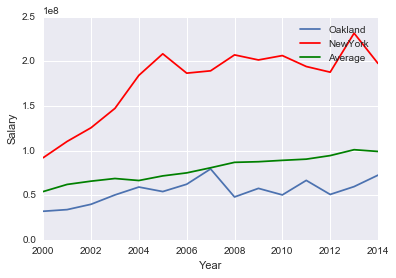

In [247]:
plt.plot(Oakland["yearID"],Oakland["salary"])
plt.plot(NewYork["yearID"],NewYork["salary"],color="r")
plt.plot(batter_year["yearID"],batter_year["salary"],color="g")
plt.legend(["Oakland","NewYork","Average"])
plt.xlabel("Year")
plt.ylabel("Salary")

As you can see the average salary of OAK is lower than average of all and far fewer tha that of NYA.(1/4~1/2)

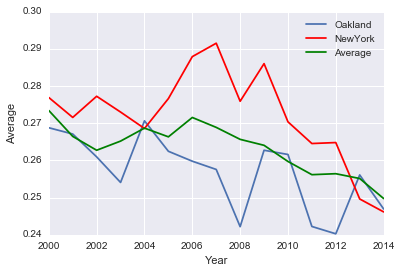

In [248]:
plt.plot(Oakland["yearID"],Oakland["AVE"])
plt.plot(NewYork["yearID"],NewYork["AVE"],color="r")
plt.plot(batter_year["yearID"],batter_year["AVE"],color="g")
plt.legend(["Oakland","NewYork","Average"])
plt.xlabel("Year")
plt.ylabel("Average")


Interestingly, the batting average of OAK is basically lower than the batting average of all teams,except year of 2000(Rank1),2004(Rank2),2010(Rank2) and 2013(Rank1). On the other hand NYA has high batting average.
Judging from this,high batting average seems to be important but is not necessary for good rank.

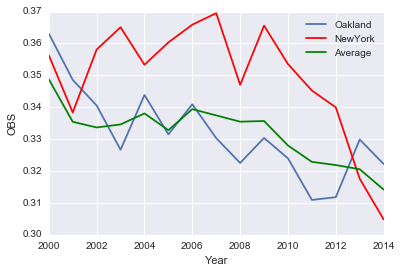

In [249]:
plt.plot(Oakland["yearID"],Oakland["OBP"])
plt.plot(NewYork["yearID"],NewYork["OBP"],color="r")
plt.plot(batter_year["yearID"],batter_year["OBP"],color="g")
plt.legend(["Oakland","NewYork","Average"])
plt.xlabel("Year")
plt.ylabel("OBS")


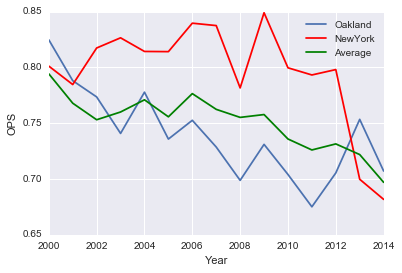

In [250]:
plt.plot(Oakland["yearID"],Oakland["OPS"])
plt.plot(NewYork["yearID"],NewYork["OPS"],color="r")
plt.plot(batter_year["yearID"],batter_year["OPS"],color="g")
plt.legend(["Oakland","NewYork","Average"])
plt.xlabel("Year")
plt.ylabel("OPS")

NYA has high numbers in terms of OBP and OPS. OAK has good numbers in 2000,2001,2013 and 2014 which are higher than NYA. From 2007 to 2011(Oak was not so good), OAK has much fewer numbers in OPS than that of average of all teams.

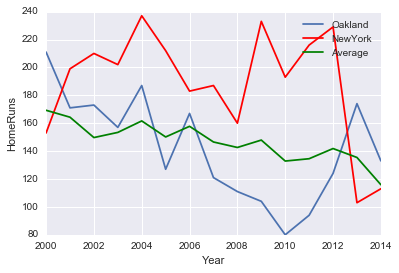

In [251]:
plt.plot(Oakland["yearID"],Oakland["HR"])
plt.plot(NewYork["yearID"],NewYork["HR"],color="r")
plt.plot(batter_year["yearID"],batter_year["HR"],color="g")
plt.legend(["Oakland","NewYork","Average"])
plt.xlabel("Year")
plt.ylabel("HomeRuns")

NYA has many homeruns except 2013 and 2014.
OAK is also higher numbers than the average except form 2007 to 2012.

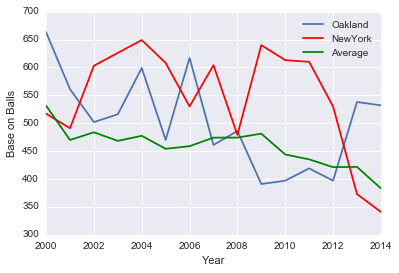

In [252]:
plt.plot(Oakland["yearID"],Oakland["BB"])
plt.plot(NewYork["yearID"],NewYork["BB"],color="r")
plt.plot(batter_year["yearID"],batter_year["BB"],color="g")
plt.legend(["Oakland","NewYork","Average"])
plt.xlabel("Year")
plt.ylabel("Base on Balls")



The number of base on balls in OAK and NYA is higher than the average in most years.

OAK and NYA belong to American League which adopts DH and the Average in above graphs includes National League which doesn't include DH.
Pitchers aren't good batters compared with others. Therefore, if I exclude pitchers from batting performance, the result will be slightly higer.(But the result may be limited since there are 8 batters other than a picher in a game and the batting order of pitches will be 9 which is the smallest chances of batting.)

# Conclusion
Since NYA pays much higher than OAK,it is understandable that the performance of players are good in many factors(showed above). OAK pays much less than NYA and even less than the average of all teams,but OAK shows good performance in rank. It is often said that strong team has high batting average but OAK is lower than the average in terms of batting average.However, OAK has good numbers in OBP,OPS,HR and especially BB when OAK is good rank. From these facts, I suppose that high average is certainly important but not necessary.From the fact that OAK has large number of BBs, I guess opponent team has to pitch more toward OAK.The more pitchers pitch,the more stamina they use up. Therefore, they might miss-pitch toward OAK's batter. That may lead to high number of HRs.If there were data about the number of pitches which opponents pitch, I could see the relationship between the number of pitches and the number of HRs.